# Homework - perform multiple linear regression on the `FuelConsumption.csv data`

## By: Daniel Sierra Botero C.C: 1152216176

* use follwing features: `['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB'`
* make a two 2D plot of ENGINESIZE vs CO2EMISSIONS and CYLINDERS vs CO2EMISSIONS
* make a 3D plot of ENGINESIZE and CYLINDERS vs CO2EMISSIONS
* apply feature scaling (be able to swith it off and on) (commented or not commented)
* split the data into X_train/y_train and X_test/y_test (80%-20%)
  using `from sklearn.model_selection import train_test_split`
* train the model using X_train data
* evaluate the fit (R-Squared)
* print the metrics MAE, MAPE
* predict CO2 emission of the 10 randomly chosen cars, compare with the true values
* compare results with the simple single feature regression
* write short comments on each step

# Load python libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUELTYPE** e.g. z
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data into Pandas</h2>

In [2]:
fuel_consuption = pd.read_csv('FuelConsumption.csv')

# show first 10 rows of the dataframe
fuel_consuption.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [3]:
# check if there is any missing data
fuel_consuption.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

Let's select some features that we want to use for regression.

We generate a new dataframe with the features that we will use for the regression, in this case: `['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']`

In [4]:
X_data = fuel_consuption[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
X_data.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
0,2.0,4,9.9,6.7,8.5
1,2.4,4,11.2,7.7,9.6
2,1.5,4,6.0,5.8,5.9
3,3.5,6,12.7,9.1,11.1
4,3.5,6,12.1,8.7,10.6
5,3.5,6,11.9,7.7,10.0
6,3.5,6,11.8,8.1,10.1
7,3.7,6,12.8,9.0,11.1
8,3.7,6,13.4,9.5,11.6
9,2.4,4,10.6,7.5,9.2


Let's plot Emission values with respect to Engine size:


<h2 id="reading_data">Visualize the data in 2D</h2>

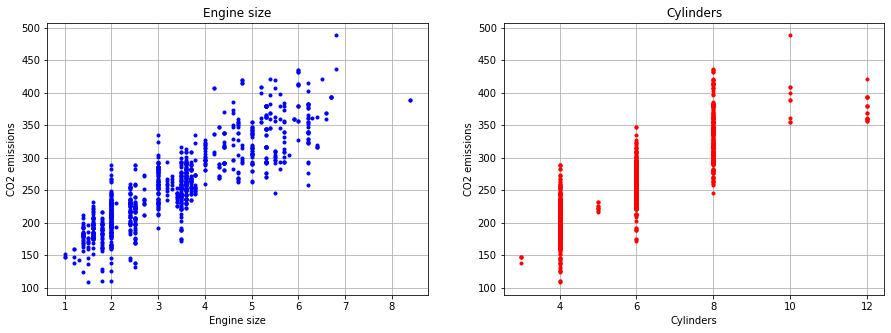

In [5]:
y_data = fuel_consuption[['CO2EMISSIONS']]

fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].title.set_text('Engine size')
ax[0].plot(X_data['ENGINESIZE'], y_data, '.b')
ax[0].set_xlabel('Engine size')
ax[0].set_ylabel('CO2 emissions')
ax[0].grid('True')

ax[1].title.set_text('Cylinders')
ax[1].plot(X_data['CYLINDERS'], y_data, '.r')
ax[1].set_xlabel('Cylinders')
ax[1].set_ylabel('CO2 emissions')
ax[1].grid('True')

<h2 id="reading_data">Visualize the data in 3D</h2>

Text(0.5, 0.92, 'Engine size and cylinders vs CO2 emissions')

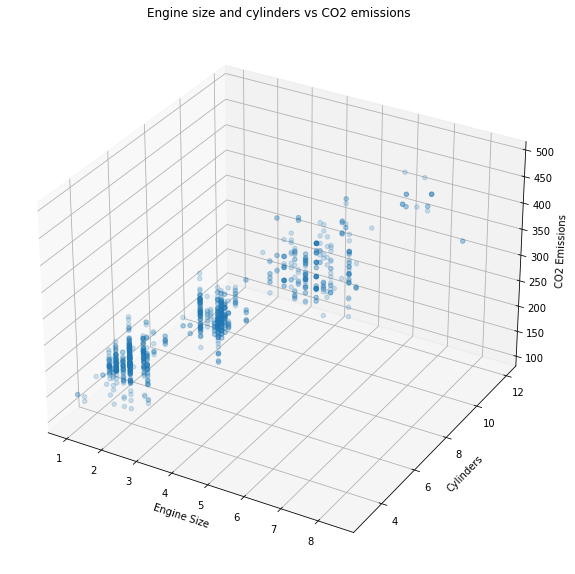

In [6]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_data["ENGINESIZE"], X_data["CYLINDERS"], y_data, '.b', alpha=0.2)
ax.set_xlabel("Engine Size")
ax.set_ylabel("Cylinders")
ax.set_zlabel("CO2 Emissions")
ax.set_title("Engine size and cylinders vs CO2 emissions")

# Normalize the data by feature-scaling
* try to make in a way that you can turn it on and off
* if you comment the feature scaling the program should still work

In [14]:
#Function to normalize each feature

def normalize(df):
    # create a copy the dataframe
    df_normalized = df.copy()
    
    for column in df_normalized.columns:
        df_normalized[column] = (df_normalized[column] - df_normalized[column].mean())/df_normalized[column].std()
        
    return(df_normalized)

In [17]:
# You can create a new dataframe in which to store the normalized data or save these on 'X_data'
# in any case if you do not want to normalize the data you must comment the following line.

X_data = normalize(X_data)

In [23]:
X_data.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
0,-0.950846,-0.998500,-0.828169,-0.992876,-0.883890
1,-0.668339,-0.998500,-0.511193,-0.635031,-0.568305
2,-1.303979,-0.998500,-1.779098,-1.314936,-1.629817
3,0.108555,0.114189,-0.145451,-0.134049,-0.137962
4,0.108555,0.114189,-0.291748,-0.277187,-0.281410
5,0.108555,0.114189,-0.340514,-0.635031,-0.453547
6,0.108555,0.114189,-0.364896,-0.491894,-0.424857
7,0.249808,0.114189,-0.121068,-0.169834,-0.137962
8,0.249808,0.114189,0.025228,0.009089,0.005485
9,-0.668339,-0.998500,-0.657490,-0.706600,-0.683063


# Split the data into train and test using scikit-learn

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

In [33]:
# We use the function train_test_split from sklearn
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.3, random_state=23)

print('X_test has:', X_test.shape[0], 'data')
print('X_train has:', X_train.shape[0], 'data')

X_test has: 321 data
X_train has: 746 data


<h2 id="multiple_regression_model">Train the model using X_train and y_train sets using scikit-learn</h2>


In [35]:
#Model trining using LinearRegression from sklearn
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

As mentioned before, **Coefficient** and **Intercept**  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


<h2 id="prediction">Print the metrics</h2>

* MAE    
* MAPE    
* R-squared    

In [49]:
# To obtain the score of our model we use the test data set
r2 = linear_model.score(X_test,y_test)

print('R-squared =', r2)

# To obtain the mean absolute error and the mean absolutepercentage error
# the predictions of the model on the X_test set must be obtained and compared with the real values (y_test)

y_predict = linear_model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_predict)

print('MAE =', mae)

mape = metrics.mean_absolute_percentage_error(y_test, y_predict)

print('MAPE =', mape)

R-squared = 0.8619543188582118
MAE = 17.046629132190418
MAPE = 0.0663047330270753


<h2 id="prediction">Prediction C02 emission from ten random cars</h2>

In [60]:
# We select 10 cars at random (from the test data set to make predictions of data that the model did not receive)
X_random = X_test.sample(10)

y_random_predict = linear_model.predict(X_random)

random_df = X_random.copy()
random_df['CO2EMISSIONPREDICTIONS']= y_random_predict

random_df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONPREDICTIONS
876,0.037928,0.114189,-0.218600,-0.312971,-0.252720,250.438347
709,-0.950846,-0.998500,-1.242677,-1.279151,-1.256853,186.543157
280,-0.668339,-0.998500,-0.316131,-0.670816,-0.453547,220.180562
87,-0.244579,0.114189,-0.364896,-0.563462,-0.453547,239.933585
138,-0.244579,0.114189,-0.145451,-0.169834,-0.166652,247.896285
944,-0.950846,-0.998500,-0.755021,-0.312971,-0.596995,204.491495
679,0.108555,0.114189,0.366587,0.331149,0.349759,270.919488
83,-0.950846,-0.998500,-0.657490,-0.813954,-0.711753,205.072360
871,0.320435,0.114189,-0.242982,-0.205618,-0.224031,255.359167
151,-0.950846,-0.998500,-0.242982,-0.277187,-0.252720,219.085087


# Single feature regression

The same process is repeated only using a single feature in the X_data set

For feature engine size:

In [62]:
X_data = fuel_consuption[['ENGINESIZE']]

# Normalize data
X_data = normalize(X_data)

# Split data
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.3, random_state=23)

# Generate an train model
enginesize_model = LinearRegression()
enginesize_model.fit(X_train, y_train)

# Obtain R-square, MAE and MAPE
r2 = enginesize_model.score(X_test,y_test)

print('R-squared =', r2)

y_predict = enginesize_model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_predict)

print('MAE =', mae)

mape = metrics.mean_absolute_percentage_error(y_test, y_predict)

print('MAPE =', mape)

R-squared = 0.7391374474004689
MAE = 24.56822938036214
MAPE = 0.09727793741775395


For feature cylinders:

In [63]:
X_data = fuel_consuption[['CYLINDERS']]

# Normalize data
X_data = normalize(X_data)

# Split data
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.3, random_state=23)

# Generate an train model
enginesize_model = LinearRegression()
enginesize_model.fit(X_train, y_train)

# Obtain R-square, MAE and MAPE
r2 = enginesize_model.score(X_test,y_test)

print('R-squared =', r2)

y_predict = enginesize_model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_predict)

print('MAE =', mae)

mape = metrics.mean_absolute_percentage_error(y_test, y_predict)

print('MAPE =', mape)

R-squared = 0.7081524991043937
MAE = 26.283565643681346
MAPE = 0.10453910546513626


For feature fuel consumption city:

In [65]:
X_data = fuel_consuption[['FUELCONSUMPTION_CITY']]

# Normalize data
X_data = normalize(X_data)

# Split data
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.3, random_state=23)

# Generate an train model
enginesize_model = LinearRegression()
enginesize_model.fit(X_train, y_train)

# Obtain R-square, MAE and MAPE
r2 = enginesize_model.score(X_test,y_test)

print('R-squared =', r2)

y_predict = enginesize_model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_predict)

print('MAE =', mae)

mape = metrics.mean_absolute_percentage_error(y_test, y_predict)

print('MAPE =', mape)

R-squared = 0.8097790672183607
MAE = 19.41122261644354
MAPE = 0.07248909361113351


For feature fuel consumption hwy:

In [66]:
X_data = fuel_consuption[['FUELCONSUMPTION_HWY']]

# Normalize data
X_data = normalize(X_data)

# Split data
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.3, random_state=23)

# Generate an train model
enginesize_model = LinearRegression()
enginesize_model.fit(X_train, y_train)

# Obtain R-square, MAE and MAPE
r2 = enginesize_model.score(X_test,y_test)

print('R-squared =', r2)

y_predict = enginesize_model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_predict)

print('MAE =', mae)

mape = metrics.mean_absolute_percentage_error(y_test, y_predict)

print('MAPE =', mape)

R-squared = 0.7563420971153989
MAE = 23.623302843068483
MAPE = 0.09082596507512608


For feature fuel consumption comb:

In [67]:
X_data = fuel_consuption[['FUELCONSUMPTION_COMB']]

# Normalize data
X_data = normalize(X_data)

# Split data
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.3, random_state=23)

# Generate an train model
enginesize_model = LinearRegression()
enginesize_model.fit(X_train, y_train)

# Obtain R-square, MAE and MAPE
r2 = enginesize_model.score(X_test,y_test)

print('R-squared =', r2)

y_predict = enginesize_model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_predict)

print('MAE =', mae)

mape = metrics.mean_absolute_percentage_error(y_test, y_predict)

print('MAPE =', mape)

R-squared = 0.8036311118675539
MAE = 20.294468286387474
MAPE = 0.07628268102999998


Looking at the results obtained for the single feature regression models, we can see that the features that give models with the best score are: 'FUELCONSUMPTION_COMB' and 'FUELCONSUMPTION_CITY'. However, the multilinear regression model is the one that presents the best results.